In [33]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
from tqdm import tqdm
folder = Path.cwd().parent
import matplotlib.pyplot as plt
# pd.set_option("display.precision", 2)

number = '016'

In [34]:
combined = True

main_path = folder / '_storage' / 'main' / number

file= open(main_path / "info.txt","r") 
print(file.read())
file.close()  

if combined == True:
    print('1')
    
    com_network = pd.read_csv(main_path / 'combined_network.csv').drop('Unnamed: 0',axis=1)

#     pickle_in = open(main_path / 'combined_network.pickle'  , 'rb' )
#     com_network = pickle.load(pickle_in)
#     pickle_in.close()

    print('2')
    
    com_vessels = pd.read_csv(main_path / 'combined_vessels.csv').drop('Unnamed: 1',axis=1).rename(columns={'Unnamed: 0':'step'})

#     pickle_in2 = open(main_path / 'combined_vessels.pickle' , 'rb' )
#     com_vessels = pickle.load(pickle_in2)
#     pickle_in2.close()

    print('3')  
else:
    print('1')
    
#     network = pd.read_csv(main_path / 'network.csv')

    pickle_in = open(main_path / 'network.pickle'  , 'rb' )
    network = pickle.load(pickle_in)
    pickle_in.close()

    print('2')

    pickle_in2 = open(main_path / 'changes.pickle' , 'rb' )
    RK4 = pickle.load(pickle_in2)
    pickle_in2.close()

    print('3')

    pickle_in3 = open(main_path / 'vessels.pickle' , 'rb' )
    vessels_alltime = pickle.load(pickle_in3)
    pickle_in3.close()

    print('4')
    
v = com_vessels
n = com_network

Time of simulation: 15 seconds
Number of iterations: 5001
therefore time step is: 0.003 seconds
Delay for pressure drop: 2 seconds
Time over which pressure drops: 2 seconds
Ratio pressure drop: 0.5
kp_constant: 0.0033333333333333335
kn_constant: 0.0016666666666666668
Date and time: 2020-04-07 22:00:29.137365
save_changes: True

1
2
3


In [35]:
def time_step_display(com_network,com_vessels,i):
    if i != 0:
        display(com_network.iloc[[i-1,i,i+1],:])
    else:
        display(com_network.iloc[[i,i+1],:])

    display(com_vessels[com_vessels['step'] == i])

In [36]:
# time_step_display(com_network,com_vessels,2)
print(n.columns)

Index(['t', 'pressure_difference', 'phi', 'phi_min', 'R_tot', 'Q_tot',
       'Q_norm', 'pt_averaged', 'kp_p', 'kp_n', 'Ap', 'Dp', 'kn_p', 'kn_n',
       'An', 'Dn', 'c', 'pt_volume_averaged', 'dphidt', 'dApdt', 'dDpdt',
       'dAndt', 'dDndt', 'dcdt'],
      dtype='object')


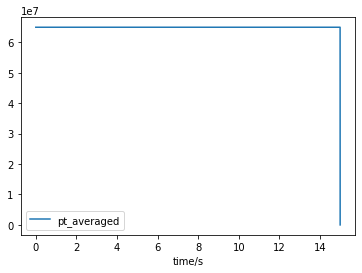

In [42]:
def norm_ave(column):
    norm = column/(column.mean())
    return norm
def p(column_name):
    plt.plot(n['t'],n[column_name],label=column_name)
def p_partial(column_name,a,b):
    plt.plot(n['t'][a:b],n[column_name][a:b],label=column_name)
def p_ave(column_name):
    plt.plot(n['t'],norm_ave(n[column_name]),label=column_name)


p('pt_averaged')
# p_ave('dphidt')

plt.xlabel('time/s')
plt.legend()

In [44]:
v

,step,Diameter(µm),Length(µm),M,Name,Number,Q in single(µm3/s),Resistance for Q,Saturation in,Saturation out,Sav,Vt(µm3),X-Area wall(???),dSindt,dSoutdt,dptdt,partial pressure blood(mmHg),pt_by_Vt,tissue partials(mmHg),wall thickness(µm)
0,0,23.97,1267.6,0.000796,A1,1,3.712173e+06,1.866110e-06,0.9400,0.9300,0.9350,3.920026e+06,438.213672,0.0,0.0,1.102059e-12,68.843131,2.574627e+08,65.678837,4.841407
1,0,19.17,930.3,0.000795,A2,2,1.857866e+06,3.158317e-06,0.9300,0.9200,0.9250,1.964399e+06,313.016429,0.0,0.0,1.230927e-12,65.327798,1.236730e+08,62.957193,4.253658
2,0,15.28,543.6,0.000790,A3,4,9.284400e+05,4.328170e-06,0.9200,0.8900,0.9050,2.962124e+06,228.546291,0.0,0.0,1.149437e-12,59.809062,1.569128e+08,52.973057,3.810683
3,0,12.08,302.3,0.000781,A4,8,4.641846e+05,5.814403e-06,0.8900,0.8400,0.8650,2.496394e+06,170.463521,0.0,0.0,1.139678e-12,52.183980,1.006845e+08,40.331980,3.485850
4,0,9.46,161.2,0.000759,A5,16,2.310272e+05,7.874816e-06,0.8400,0.7650,0.8025,1.919460e+06,130.572935,0.0,0.0,1.118508e-12,44.546726,4.740023e+07,24.694563,3.265971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,4999,14.53,272.3,0.000768,V5,16,1.156284e+05,2.614226e-06,0.5975,0.5875,0.5925,2.551342e+05,214.009514,NaN,NaN,NaN,30.861700,7.573701e+06,29.685171,3.730525
64996,4999,17.79,426.6,0.000769,V4,8,2.289070e+05,1.926676e-06,0.5875,0.5825,0.5850,2.524554e+05,281.309064,NaN,NaN,NaN,30.512889,7.535014e+06,29.846912,4.092089
64997,4999,21.45,632.5,0.000768,V3,4,4.586021e+05,1.415510e-06,0.5825,0.5775,0.5800,5.062002e+05,369.597066,NaN,NaN,NaN,30.283174,1.491124e+07,29.457207,4.528591
64998,4999,25.70,844.2,0.000767,V2,2,9.205343e+05,9.582036e-07,0.5775,0.5725,0.5750,1.017328e+06,489.015286,NaN,NaN,NaN,30.055630,2.939787e+07,28.897134,5.060357


In [ ]:
dph